# **Digital Signal and Image Management - E04**<br/>
**Master's Degree in Data Science (A.Y. 2023/2024)**<br/>
**University of Milano - Bicocca**<br/>

prof. Simone Bianco,
dr. Marco Buzzelli

**Outline**:
* A **keypoint** is a small image region that is highly recognizable
* We will specifically work with the **SIFT** keypoint detector and descriptor
* We will see two applications of keypoints:
  * **Instance detection** (e.g. finding the cover of a specific book in an image)
    * Note that keypoints are instead *not* suitable for object/category detection (e.g. finding cats in an image)
    * They are highly tolerant to perspective distortions, and to occlusions
  * **Mosaicing** (e.g. creating a panoramic image from N views)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv # OpenCV
import cv2

# Verify OpenCV version
print(cv.__version__)

4.9.0


In [34]:

import cv2 as cv
print(cv.__version__)

4.9.0


https://docs.opencv.org/4.8.0/da/df5/tutorial_py_sift_intro.html<br/>
https://docs.opencv.org/4.8.0/d1/d89/tutorial_py_orb.html<br/>
https://docs.opencv.org/4.8.0/df/dd2/tutorial_py_surf_intro.html

**Note:**
* SIFT stands for Scale-Invariant Feature Transform
* SIFT support was included in a previous version of OpenCV, later removed due to patents issues, and finally reincluded in version 4.4
* If you cannot get (locally) a recent version of OpenCV, you can also consider installing an older version that supports SIFT:
  * `pip install opencv_contrib_python==3.4.2.17 --force-reinstall`
  * `conda install -c menpo opencv`
* Some commands might expose a slightly different syntax, e.g.:
  * `cv.xfeatures2d.SIFT_create()` instead of `cv.SIFT_create()`
* Alternatively, it is possible to use open-source alternatives to SIFT, such as ORB or SURF

In [5]:
# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15, 5] # width, height

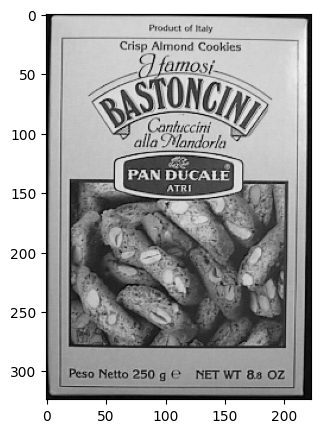

In [6]:
# Load image
box = cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/box.png', cv.IMREAD_GRAYSCALE)
plt.imshow(box, cmap='gray'); plt.show()



https://docs.opencv.org/4.8.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56<br/>
https://docs.opencv.org/4.8.0/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80

**Note:**
* We will process the image using OpenCV, so it makes sense to also load it with OpenCV itself
* The second parameter forces the image to be imported as grayscale (single-channel)
* OpenCV documentation usually incluedes both C++ and Python signatures

## SIFT detection and description

In [7]:
# Creating an instance for SIFT
sift = cv.SIFT_create()

https://docs.opencv.org/4.8.0/d7/d60/classcv_1_1SIFT.html#ad337517bfdc068ae0ba0924ff1661131<br/>

**Note:**
* SIFT keypoints are image regions that are highly characteristic/discriminative
  * I.e. they can be useful to recognize the same image in a different context
* A good keypoint would be a corner, or a letter
* A bad keypoint would be a uniform region

In [8]:
# SIFT detection and description
(kps1, features1) = sift.detectAndCompute(box, None)

https://docs.opencv.org/4.8.0/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677

**Note:**
* `detectAndCompute()` produces two outputs:
  * `keypoints`: the coordinates of each keypoint center position
  * `descriptors`: a feature vector that characterizes each keypoint surrounding area
* By design, SIFTs are rotation-invariant:<br/>
     a corner will have the same descriptor, regardless of its orientation.

In [20]:
# Number of detected keypoints
len(kps1)

604

In [11]:
# Corresponding descriptors
features1.shape

(604, 128)

**Note:**
* In this image, we have found 604 regions that are potentially useful to identify the same object in a different context.
* Each descriptor is a 128-elements-long feature vector
* Each keypoint is a custom class (see following)

In [11]:
# Available information for each keypoint
print(type(kps1[0]))
print(dir(kps1[0]))

<class 'cv2.KeyPoint'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


**Note:**
* Using `dir()` we can get the list of attributes and methods for a custom class, such as `cv2.KeyPoint`.
  * The most important ones, which are specific for the class, are found at the end of the list (their names do not begin with an underscore)
* Each keypoint is associated to the following information:
  * A 128-dimensional descriptor (external variable, called ``features1`` in our case)
  * A set of properties (which can be accessed directly from the keypoint itself):
    * `angle`:<br/>
      In case we do **not** want rotation-invariance, we can use this information.
    * `class_id`
    * `octave`:<br/>
      The image is scanned for keypoints at various resolutions.<br/>
      This indicates the scale at which the current keypoint was found.
    * `pt`:<br/>
      This contains the actual coordinates of the keyopint.
    * `response`
    * `size`


In [12]:
# Example: coordinates of the first keypoint
kps1[0].pt

(3.1613831520080566, 204.0614776611328)

### Keypoint visualization

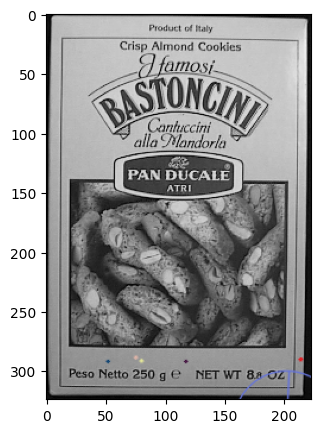

In [159]:
# SIFT keypoints visualization
box_kps = cv.drawKeypoints(box, kps1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(box_kps); plt.show()

https://docs.opencv.org/4.8.0/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920

**Note:**
* Some keypoints are **apparently** in uniform regions (see top left area)
* In practice, this is identified as being enclosed by two lines at a specific relative angle

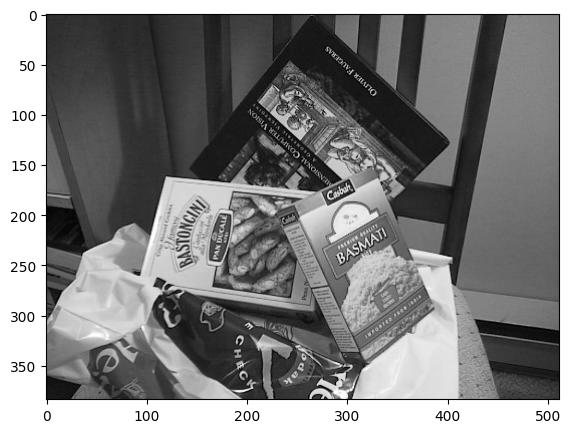

In [9]:
# Load the background image
scene = cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/box_in_scene.png', cv.IMREAD_GRAYSCALE)
plt.imshow(scene, cmap='gray'); plt.show()

In [12]:
# Detect and describe SIFT keypoints on the second image
(kps2, features2) = sift.detectAndCompute(scene, None)

In [13]:
len(features2)

969

## Matching

In [14]:
# Find correspondences (matches) between the two images
bf = cv.BFMatcher.create(crossCheck=True)
matches = bf.match(features1, features2)

https://docs.opencv.org/4.8.0/dc/dc3/tutorial_py_matcher.html<br/>
https://docs.opencv.org/4.8.0/d3/da1/classcv_1_1BFMatcher.html#ac6418c6f87e0e12a88979ea57980c020<br/>
https://docs.opencv.org/4.8.0/db/d39/classcv_1_1DescriptorMatcher.html#a0f046f47b68ec7074391e1e85c750cba

**Note:**
* We want to find a correspondence between (some) descriptors of the first image, and (some) descriptors of the second image.
* We will use a 'Brute Force' matcher:
  * Each descriptor from the first image is compared with all descriptors from the second image
  * The keypoint location is ignored
  * The features are compared with a metric, and the most similar is selected (if similarity is above a given threshold)
* `crossCheck=True` requires that 'most similar' runs in both directions:
  * Given a keypoint from image 1, we find its most similar from image 2
  * Given that most similar keypoint from image 2, we check that its most similar from image 1 is the keypoint we started with.

In [18]:
# Number of matches between the two images
len(matches)

258

In [15]:
# Information associated to each match
print(type(matches[0]))
print(dir(matches[0]))

<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


**Note:**
* `matches` is a list, and each element 'connects' a keypoint from image 1 with a keypoint from image 2.
* Each match is associated to the following information:
  * `distance`:<br/>
     this does **not** refer to spatial distance, in fact remember that we are currently ignoring the keypoints location.
     Instead, it refers to distance in feature space, i.e. dissimilarity.
  * `imgIdx`
  * `queryIdx`:<br/>
     This is the keypoint *index* from the first image (`box`)
  * `trainIdx`:<br/>
     This is the keypoint *index* from the second image (`box_in_scene`)

In [44]:
# Examples: details of the first match.

In [21]:
# Keypoint index of the first image (box)
matches[0].queryIdx

0

In [22]:
# Keypoint index of the second image (scene)
matches[0].trainIdx

881

**Note:**
* This is is interpreted as:<br/>
  the descriptor of keypoint number 0 from the first image, is very similar to the descriptor of keypoint number 881 from the second image.

### Visualization of the matches

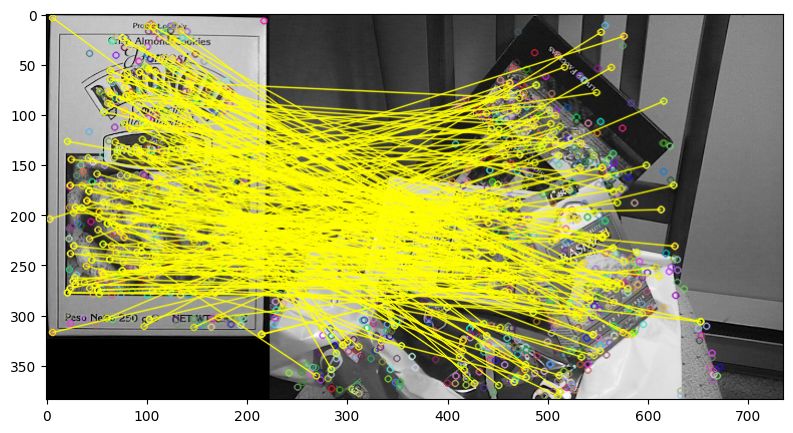

In [16]:
# Visualization of the matches
result = cv.drawMatches(box, kps1, scene, kps2, matches, None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

https://docs.opencv.org/4.8.0/d4/d5d/group__features2d__draw.html#gad8f463ccaf0dc6f61083abd8717c261a

**Note:**
* The set of matches contains many false positives.
* One possible solution is to sort the matches starting from the most confident ones (i.e. those with very similar descriptors, i.e. with low value of distance), and limit the visualization to the first N matches

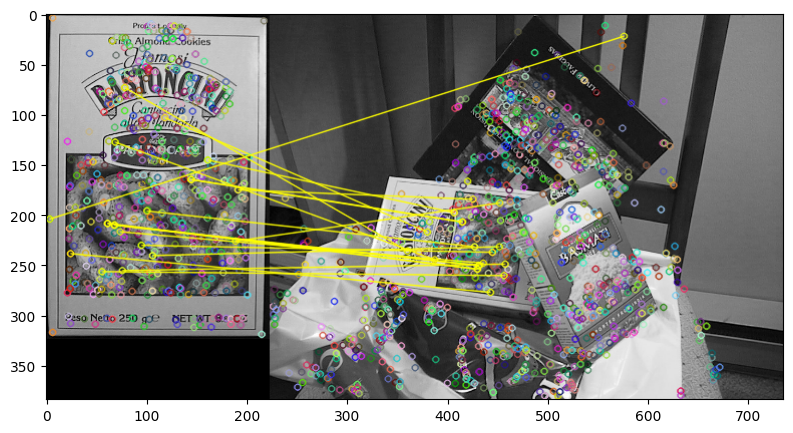

In [24]:
# Visualization of only filtered matches
matches = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(box, kps1, scene, kps2, matches[0:20], None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

**Note:**
* `sorted` is a native python function
* However, `matches` is not a native type, such as integers, so `sorted` would not know how to handle it (which criterion to use for sorting)
* We create an on-the-fly function (lambda function) that takes an input (renamed `x`) and returns its `distance` property.
  * This value will be used by `sorted` to perform its sorting.

## Assignment: Photo stitching

**Approach:**
1. Use a pair of custom images (different from the ones provided).
   * The two images must have a partial overlap
2. Extract keypoints and find matches (no sorting/filtering matches is needed here)
3. Find the homography which describes the transformation from the second set of points to the first one
4. Apply the homography to the second image
5. Integrate the first image

It is not allowed to use `cv.createStitcher()` or other complete functions for image stitching.<br/>
You should, however, use pre-made functions for the computation of the homography and for image warping.

In [60]:
# Image loading
im1 = cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/img1.jpg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/img2.jpg', cv.IMREAD_GRAYSCALE)



In [61]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
sift = cv.SIFT_create()

In [62]:
# # Image loading
# im2 = cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/boat1.jpg', cv.IMREAD_GRAYSCALE)
# im1= cv.imread('C:/Users/sam/Desktop/DSP/Assignments/DSIM_E04_material/boat2.jpg', cv.IMREAD_GRAYSCALE)

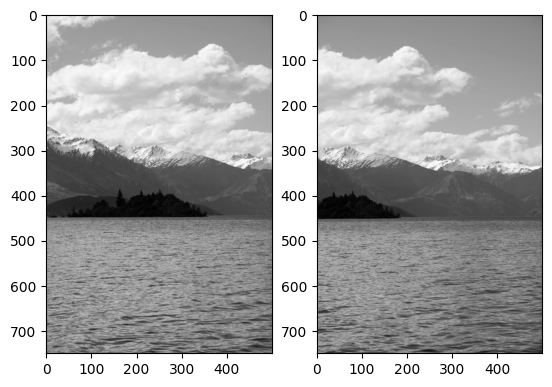

In [63]:

plt.subplot(1,2,1); plt.imshow(im1, cmap='gray');
plt.subplot(1,2,2); plt.imshow(im2, cmap='gray');
plt.show()

**Note:**
* The right part of the first image has the same content as the left part of the second image
* We will extract keypoints from the two, and find the matches (which will be only in the overlapping regions)

In [64]:
# Keypoints extraction
sift = cv.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)
# Features matching
bf = cv.BFMatcher.create(crossCheck=True)
matches = bf.match(features1,features2)



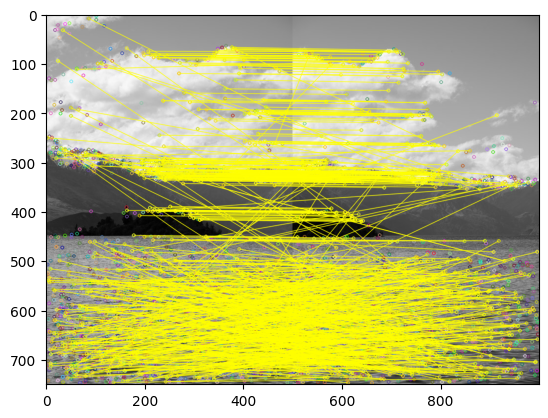

In [65]:
# Visualization of the matches
result = cv.drawMatches(im1, kps1, im2, kps2, matches, None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

In [66]:
len(matches)

663

### 1. Find the homography which describes the transformation from the <u>second</u> set of points to the <u>first</u> one

In [67]:
src_pts = 0
dst_pts = 0

In [68]:
def myHomografy(kpsA, kpsB, matches):
  kpsA = np.float32([kp.pt for kp in kpsA])
  kpsB = np.float32([kp.pt for kp in kpsB])
  
  ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
  ptsB = np.float32([kpsB[m.trainIdx] for m in matches])

  h, status = cv.findHomography(ptsA, ptsB, cv.RANSAC,
            4)
  return h

In [69]:
kpsb1, featuresb1 =sift.detectAndCompute(im1, None)
kpsb3, featuresb3 =sift.detectAndCompute(im2, None)

In [70]:

bf=cv.BFMatcher(crossCheck=True)
matchesb=bf.match(featuresb3, featuresb1)

In [71]:

matchesb_sort = sorted(matchesb, key=lambda x: x.distance)[1:100]

In [72]:
H = myHomografy(kpsb3, kpsb1, matchesb_sort)

In [73]:

print(H)

[[ 9.63326060e-01  1.61475004e-02  1.69075807e+02]
 [-2.93163206e-02  9.92269183e-01  2.93248145e-01]
 [-7.41191847e-05  2.59815305e-06  1.00000000e+00]]


https://docs.opencv.org/4.8.0/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780

**Note:**
* We have previously determined the correspondences between locations in the two images.
* We now determine the *perspective transformation* that will displace all pixels of the second image following such correspondences.
  * This transformation is also called 'homography', and it can be represented with a 3$\times$3 linear matrix
* When defining the homography, we can use RANSAC (RANdom SAmple Consensus) to improve these correspondences:
  * We do not want a transformation that is a compromise between all correspondences, as some of them are just mistakes from the Matching algorithm.
  * Instead, we want a transformation that is very well in agreement by the majority of found correspondences.
  * To achieve this, RANSAC will take 4 random matches, which are sufficient to determine a homography, and it verifies how much all other matches are well described by this transformation.
  * This process is repeated a number of times, and the transformation with the best agreement is selected as homography.

**Note:**
* You might get slightly different results, due to the non deterministic nature of RANSAC

### 2. Apply the homography to the second image

In [74]:

def myWarp(im_base, im_train, H):
  width = im_base.shape[1] + im_train.shape[1]
  height = im_base.shape[0]
  return cv.warpPerspective(im_train, H, (width, height))

In [75]:

img_final=myWarp(im1, im2, H)


https://docs.opencv.org/4.8.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87<br/>
https://docs.opencv.org/4.8.0/da/d6e/tutorial_py_geometric_transformations.html

**Note:**
* A linear transformation is applied with the rules of matrix multiplication:<br/>
$
\begin{bmatrix}
x_{out}' \\
y_{out}' \\
z_{out}'
\end{bmatrix}
 = \begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
\begin{bmatrix}
x_{in} \\
y_{in} \\
1
\end{bmatrix}$
* The output coordinates are 3-dimensional. Since we need 2-dimensional coordinates (pixel rows and columns), we must normalize by the third component:<br>
$x_{out} = \dfrac{x'_{out}}{z'_{out}}$<br/>
$y_{out} = \dfrac{y'_{out}}{z'_{out}}$
* In other terms, the output coordinates are computed as:<br/>
$x_{out} = \dfrac{h_{11}\cdot x_{in} + h_{12}\cdot y_{in} + h_{13}}{h_{31}\cdot x_{in} + h_{32}\cdot y_{in} + h_{33}}$<br/>
$y_{out} = \dfrac{h_{21}\cdot x_{in} + h_{22}\cdot y_{in} + h_{23}}{h_{31}\cdot x_{in} + h_{32}\cdot y_{in} + h_{33}}$
* This is an explanation of what happens when applying perspective warping with homographies.
* You are not expected to write your own function for warping, but to appropriately use the ones provided by OpenCV.

### 3. Integrate the first image

``im_base[from_y:to_y, from_x:to_x] = im_new``

In [76]:

def myCollage(im_base, im_train_warp):
  im_train_warp[0:im_base.shape[0], 0:im_base.shape[1]] = im_base
  plt.imshow(im_train_warp, cmap="gray")
     

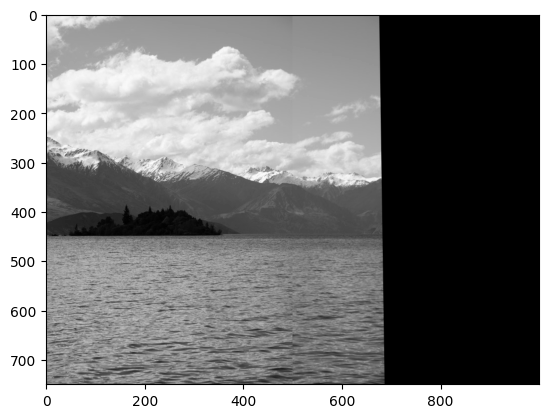

In [78]:


myCollage(im1,img_final)

**Note:**
* The two images are now 'registered'.
* We notice an artifact: the first image was shot with higher exposure, and thus it is brighter.
* Techniques for reducing these differences can be deployed, but are not requested for the assignment.